## **David Emilio Vega Bonza, david.vegabonza@colorado.edu**

### **CC 80215162, Bogotá. Colombia**

## CSCA 5622 Supervised Learning Final Project
# **Telecomunications Company Customer Churn Analysis**

## **1. Project Topic:**

Customer churn analysis in telecom companies focuses on identifying customers who are likely to leave the service provider. This project involves analyzing customer data to predict churn and understand the factors contributing to it.

In this project we will review how "Customer churn analysis" is crucial for telecom companies for several reasons:

1. **Revenue Loss Prevention**: Losing customers directly impacts a company's bottom line. By identifying patterns that lead to customer churn, telecom companies can proactively address issues and reduce the likelihood of losing subscribers.

2. **Customer Retention**: Retaining existing customers is often more cost-effective than acquiring new ones. Through churn analysis, telecom companies can implement targeted retention strategies, such as personalized offers, discounts, and loyalty programs.

3. **Competitive Edge**: The telecom industry is highly competitive. Understanding why customers leave can help companies improve their services and offerings, staying ahead of competitors and retaining their market share.

4. **Customer Satisfaction**: Churn analysis provides insights into customer behavior and preferences. This information can be used to enhance customer experiences, addressing pain points and improving overall satisfaction.

5. **Marketing Optimization**: By knowing which customers are at risk of leaving, telecom companies can focus their marketing efforts more effectively. Targeted campaigns aimed at retaining high-value customers or re-engaging those at risk of churning can lead to better returns on marketing investments.

6. **Product Development**: Insights gained from churn analysis can inform product and service development. By understanding what factors contribute to customer dissatisfaction, companies can make data-driven decisions to improve their offerings.

The main **goal is to develop predictive models that can accurately identify potential churners** and **provide insights to help telecom companies** retain their customers for a much longer time.

In summary, customer churn analysis helps telecom companies maintain their customer base, optimize marketing efforts, enhance customer satisfaction, and ultimately ensure business growth and stability.

## **2. Data:**

### **Data Source Description:**

#### Context Data Source:
- **Dataset Name:** Telco Customer Churn (focused customer retention programs)
- **Url:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- **Motivation:** "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

#### Dataset variables detail:

1. **customerID:** Customer ID

2. **gender:** Whether the customer is a male or a female

3. **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

4. **Partner:** Whether the customer has a partner or not (Yes, No)

5. **Dependents:** Whether the customer has dependents or not (Yes, No)

6. **tenure:** Number of months the customer has stayed with the company

7. **PhoneService:** Whether the customer has a phone service or not (Yes, No)

8. **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

9. **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

10. **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

11. **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

12. **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

13. **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)

14. **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

15. **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

16. **Contract:** The contract term of the customer (Month-to-month, One year, Two year)

17. **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

18. **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

19. **MonthlyCharges:** The amount charged to the customer monthly

20. **TotalCharges:** The total amount charged to the customer

21. **Churn:** Whether the customer churned or not (Yes or No)

### Import the necessary libraries and Data

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
#sns.set_theme()
#sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### Data Overview:

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Identification of categorical and numerical features

In [154]:
df=pd.read_csv("./data/telco-customer-churn.csv")

In [155]:
# Head info
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
# Head info
print(df.shape)

(7043, 21)


### Check duplicate entries

In [157]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**Observations:**
- No duplicate rows, no return boolean Series denoting.

In [158]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Setting categorical and numerical variables

In [159]:
# Categorical variables 
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Numerical variables 
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

### 2. Observations:

- There is no might correlation between the most part of numerical variables.
- We have not found till now how categorical variables might affect the defaulted people.

## **3. Data Cleaning:**

About the data wrangling, I started reading the dataset, understanding the shape (as you can see, we initially have a shape of (7043) seven thousand and (43) forty-three records and (21) twenty-one columns, (3) three numerical columns and (16) sixteen categorical columns before the ‘get_dummies’ implementation.  There are no missing or duplicated values.


In [160]:

# 1. Drop 'customerID' as this column does not gives important information 
# in the data set
df.drop('customerID', axis=1, inplace=True)

# 2. Convert Yes o No to binary (1,0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Data cleaning for the column 'TotalCharges'
blank_indexes = df[df['TotalCharges'] == ' '].index.values.tolist()
#blank_indexes , _ = df[df['TotalCharges'] == ' '].index
#print(blank_indexes)

# As we found blank string values for some 'TotalCharges' it will be useful 
# to assign the value as 'MonthlyCharges' exist
for index in blank_indexes:
    df.loc[index, 'TotalCharges'] = df.loc[index, 'MonthlyCharges']
    #print(df.iloc[index])

#Convert TotalCharges to numerical
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

### 3. Observations:

I had to develop (3) tasks for data cleaning:

- The first one was to drop the **‘customerID’** column because it does not any value for statistical analysis
- The second one was to convert string values of the column **‘Churn’** from Yes or Not to (1) one or 0 (zero) respectively.
- And finally, I found some blank string data in the column **‘Total Charges’** that was originally an ‘object’ data type, then it was necessary to update all those values, and I did it with the value of the ‘Monthly Charges’ of the customer, in conclusion I also had to update the data type to numeric as a float value.

### Check for missing values

In [161]:
### **Check for missing values**
(df.isnull().sum() / df.shape[0])*100


gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [162]:
# Checking the number of unique values in each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

### Summary Statistics

In [163]:
# Checking summary statistics
df.describe().T

#df_adjt.info()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


## **4. Exploratory Data Analysis (EDA):**

- Does it include clear explanations on how and why an analysis (EDA) is performed?

1. Does it have proper visualizations?
2. Does it have proper analysis? E.g., histogram, correlation matrix, feature importance (if possible) etc. 
3. Does it have conclusions or discussions? E.g., the EDA summary, findings, discussing foreseen difficulties and/or analysis strategy.

In [164]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )    

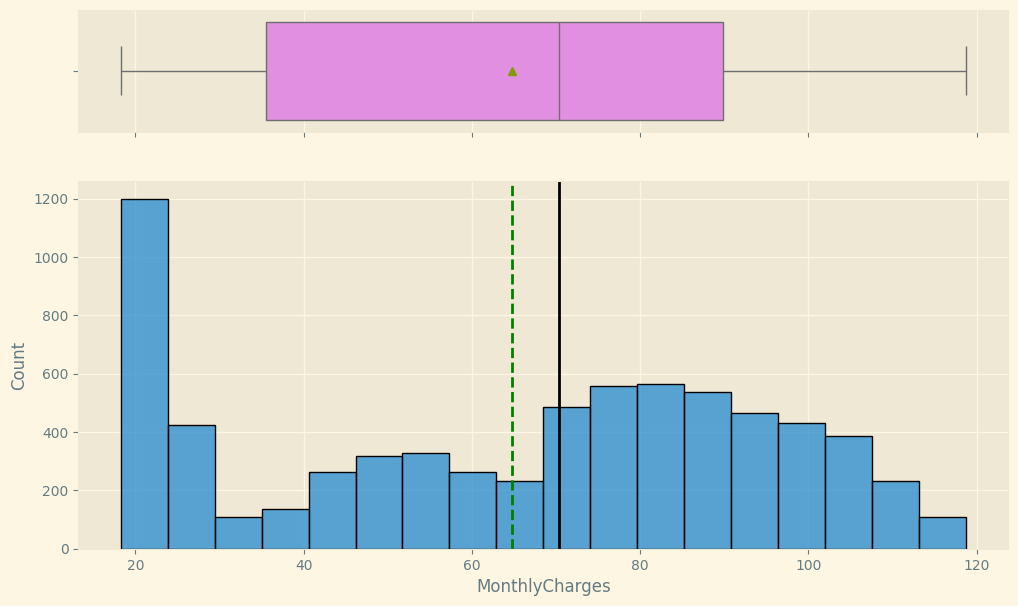

In [165]:
# 1. What is the range of values for the loan amount variable "LOAN"?
histogram_boxplot(df, "MonthlyCharges")

In [166]:
# Checking summary statistics
df['MonthlyCharges'].describe().T

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

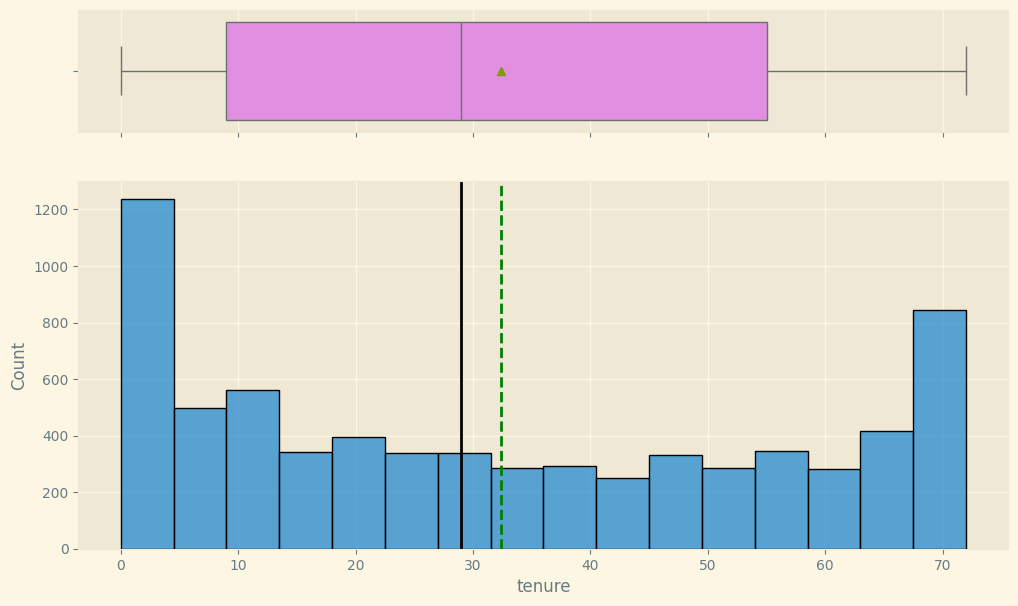

In [167]:
# 2. How does the distribution of years at "tenure" vary across the dataset?
histogram_boxplot(df, "tenure")


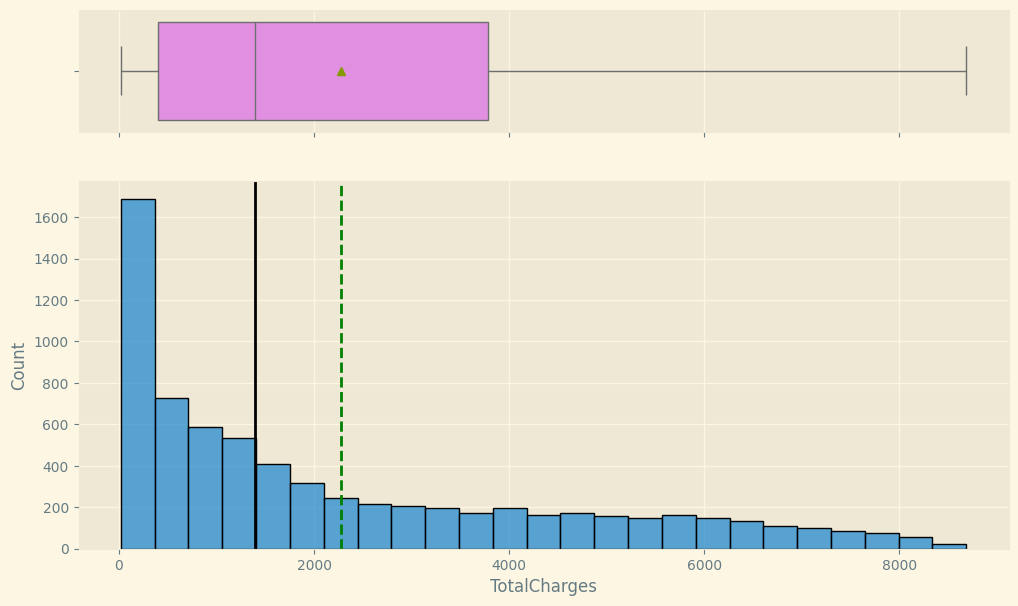

In [168]:
# 3. How does the distribution of years at "TotalCharges" vary across the dataset?
histogram_boxplot(df, "TotalCharges")


In [169]:
# What is the most common category in the Contract variable?

print(df['Contract'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%')

# Maybe draw a plt of this...

Contract
Month-to-month    55.02%
Two year          24.07%
One year          20.91%
Name: proportion, dtype: object


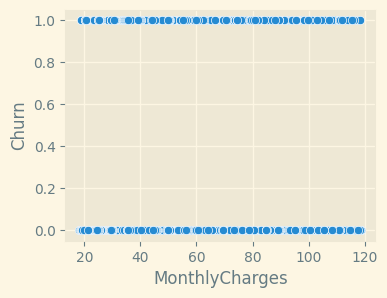

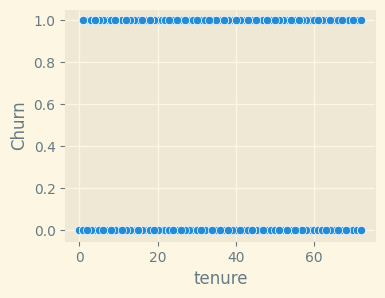

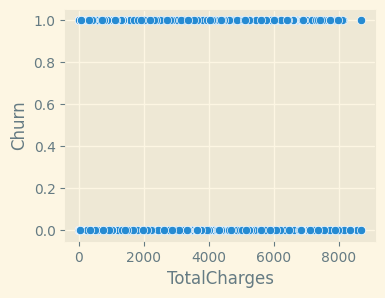

In [170]:
# 6. Do customers who churns have a significantly different MonthlyCharges, tenure, or Total Charges compared to those who are not churned?

df_churned = df[df['Churn'] == 'Yes']
df_not_churned = df[df['Churn'] == 'No']

# Maybe an scater plt comparing churns vs MonthlyCharges amount and no churns vs loan amount
plt.figure(figsize = [4, 3])
sns.scatterplot(x = df.MonthlyCharges, y = df.Churn)
plt.show()

# Maybe an scater plt comparing churns vs tenure amount and no churns vs loan amount
plt.figure(figsize = [4, 3])
sns.scatterplot(x = df.tenure, y = df.Churn)
plt.show()

# Maybe an scater plt comparing churns vs TotalCharges amount and no churns vs loan amount
plt.figure(figsize = [4, 3])
sns.scatterplot(x = df.TotalCharges, y = df.Churn)
plt.show()


**Observation**

- We can see that there is a relation of defaulted people with Loans ranging from 300.000 and 450.000 aproximately.

### **Univariate Analysis**


In [171]:
#Univariate analysis for categorical variables
print('-' * 40)
for i in categorical_cols:
    print(df[i].value_counts(normalize = True))
    print('-' * 40)

----------------------------------------
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64
----------------------------------------
SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64
----------------------------------------
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64
----------------------------------------
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64
----------------------------------------
PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64
----------------------------------------
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64
----------------------------------------
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64
----------------------------------------
OnlineSecurity
No                    

### **Bivariate Analysis**

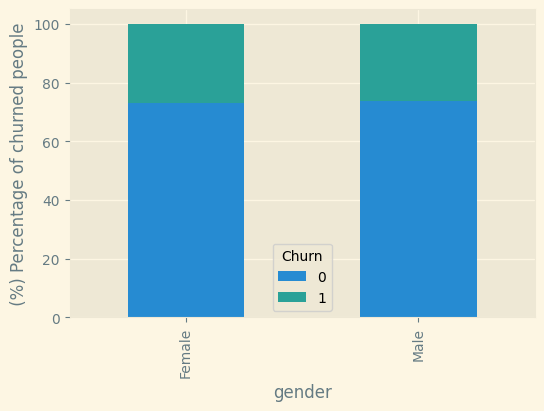

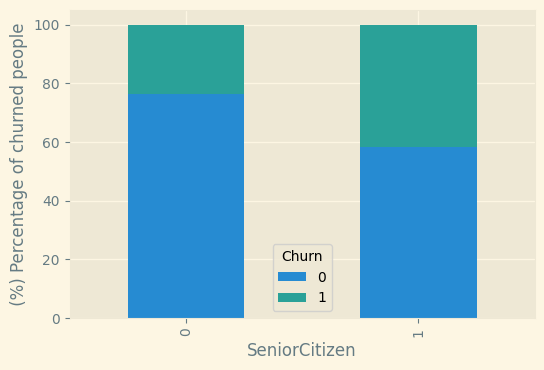

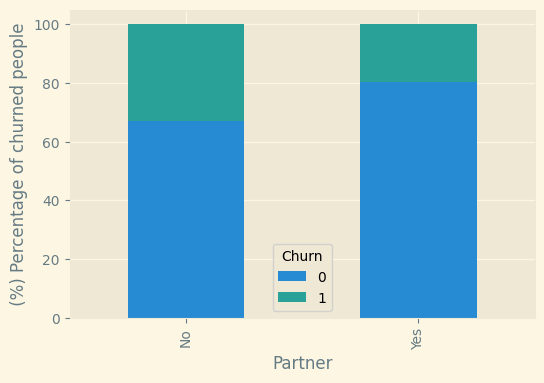

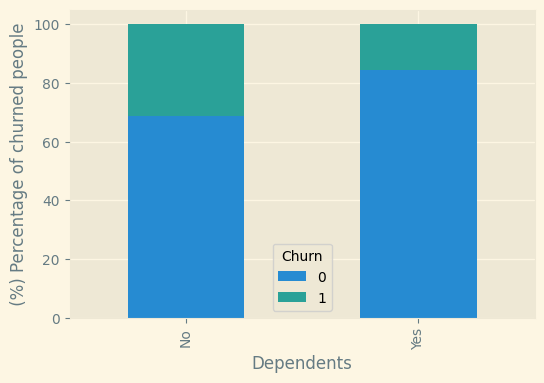

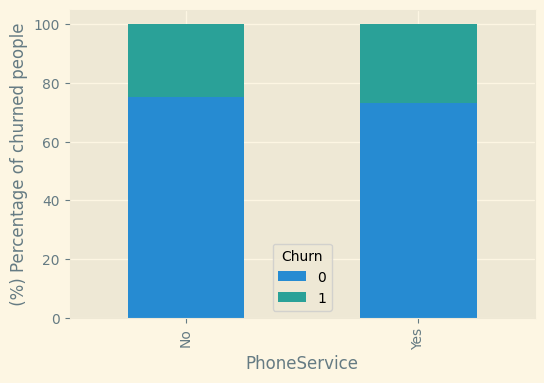

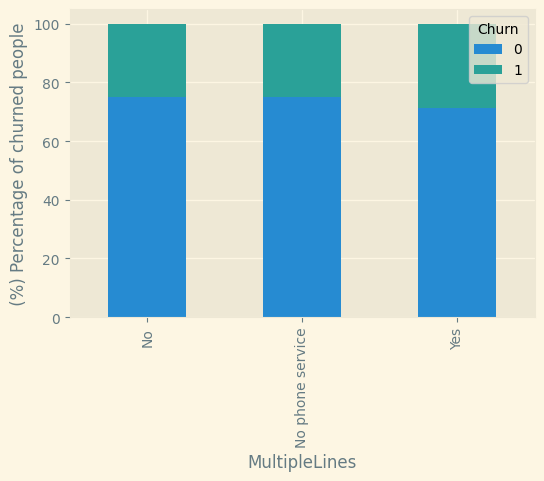

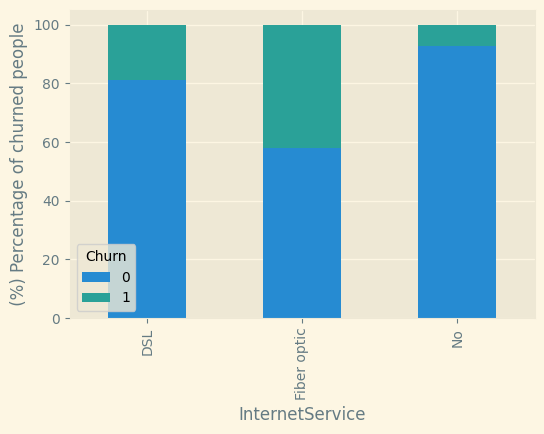

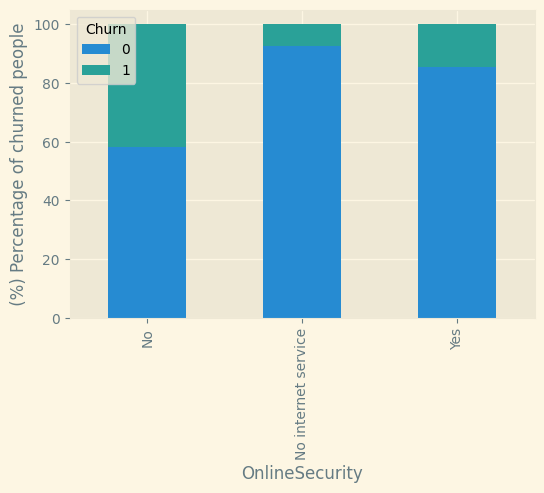

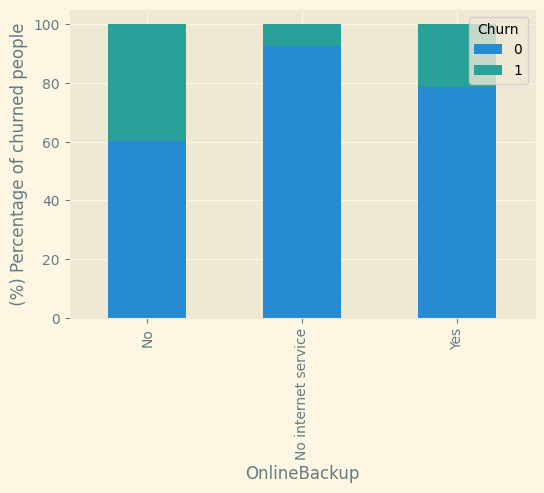

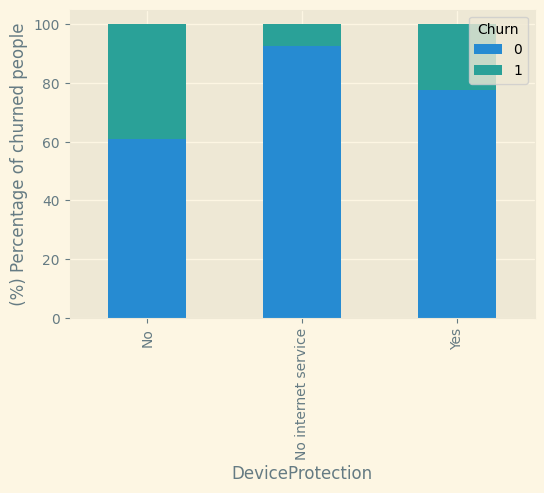

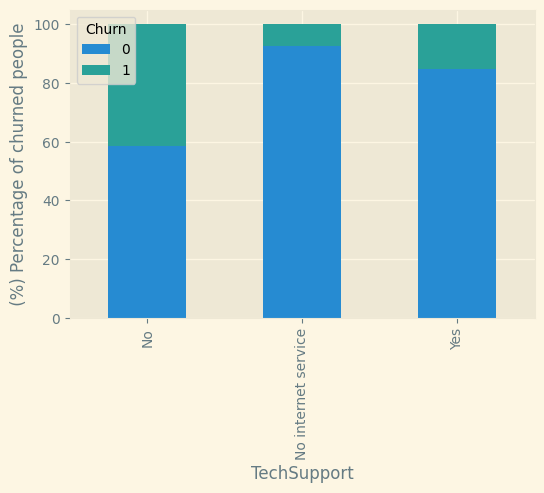

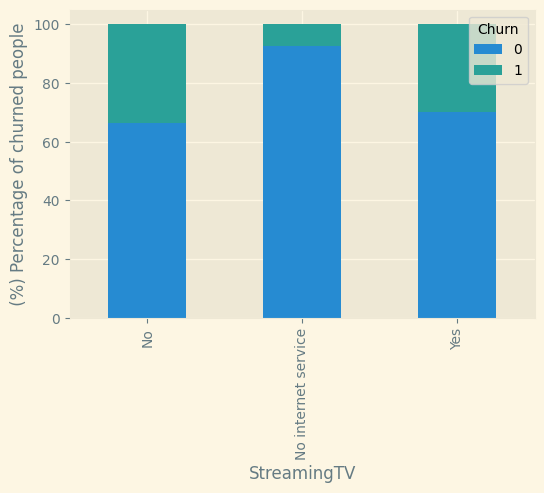

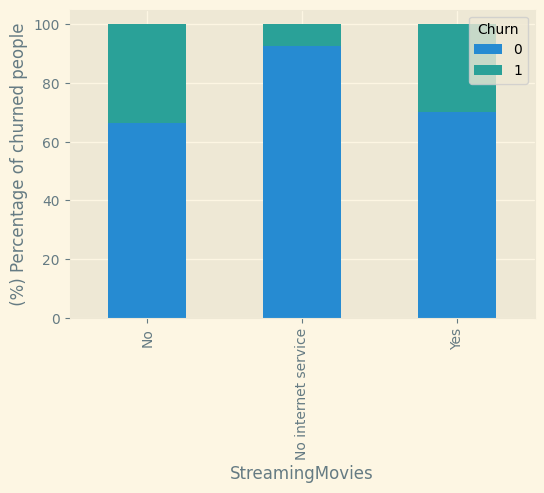

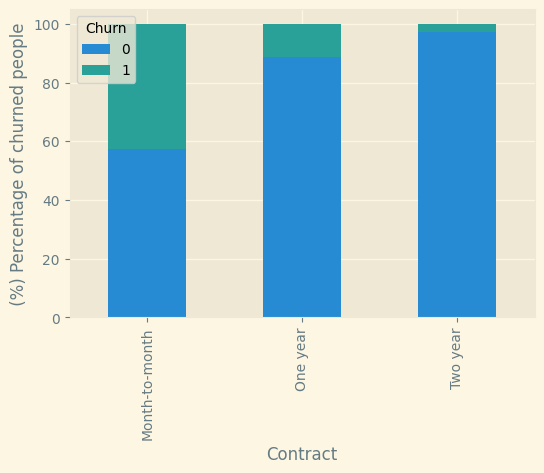

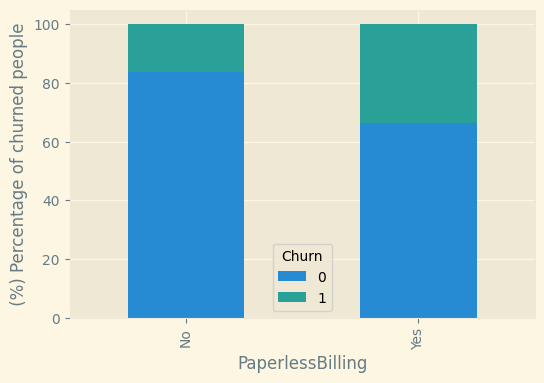

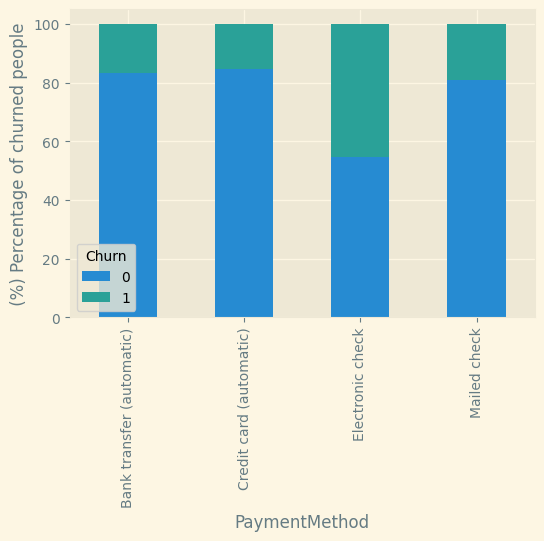

In [172]:
# **We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables**

for i in categorical_cols:
    if i != 'Churn':
        (pd.crosstab(df[i], df['Churn'], normalize = 'index')*100).plot(kind = 'bar', figsize = (6, 4), stacked = True, layout= True)
        plt.ylabel(' (%) Percentage of churned people ')

### **Multivariate Analysis**

In [173]:
# DataFrame of numerical colums
numerical_cols_df = df[numerical_cols]

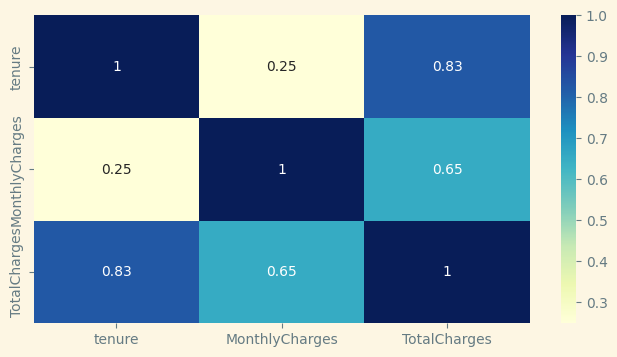

In [174]:
plt.figure(figsize  = (8, 4))
sns.heatmap(numerical_cols_df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

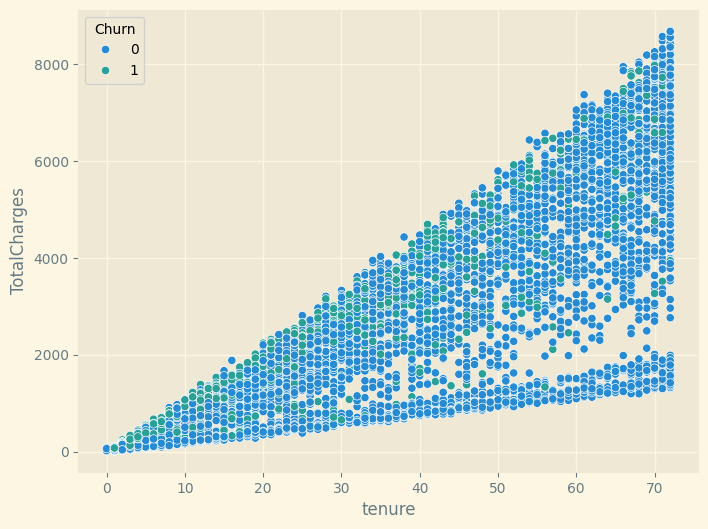

In [175]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = df.tenure, y = df.TotalCharges, hue= df.Churn, sizes=(50, 25), legend="full",)
plt.show()

**Observation**
- There is probably a high correlation between TotalCharges and tenure variables

### **Let's check the distribution and outliers for each column in the data**

### Treating Outliers

tenure
Skew : 0.24


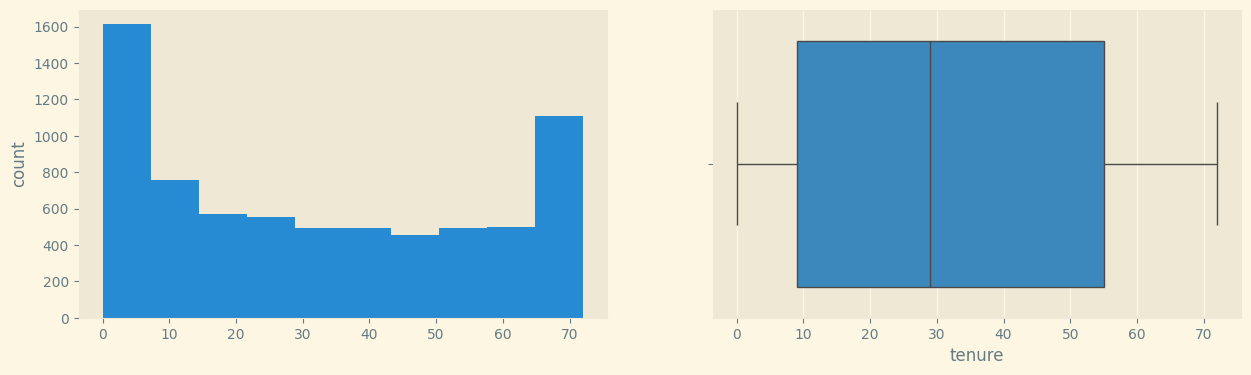

MonthlyCharges
Skew : -0.22


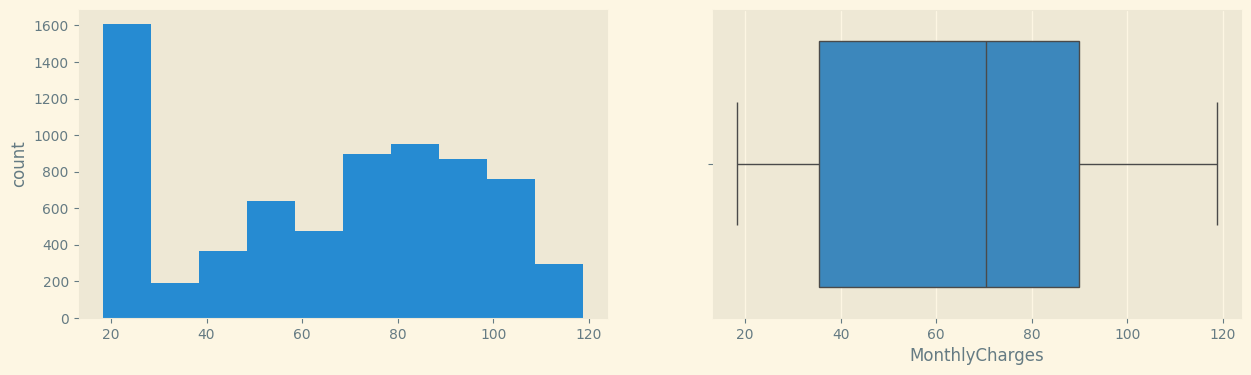

TotalCharges
Skew : 0.96


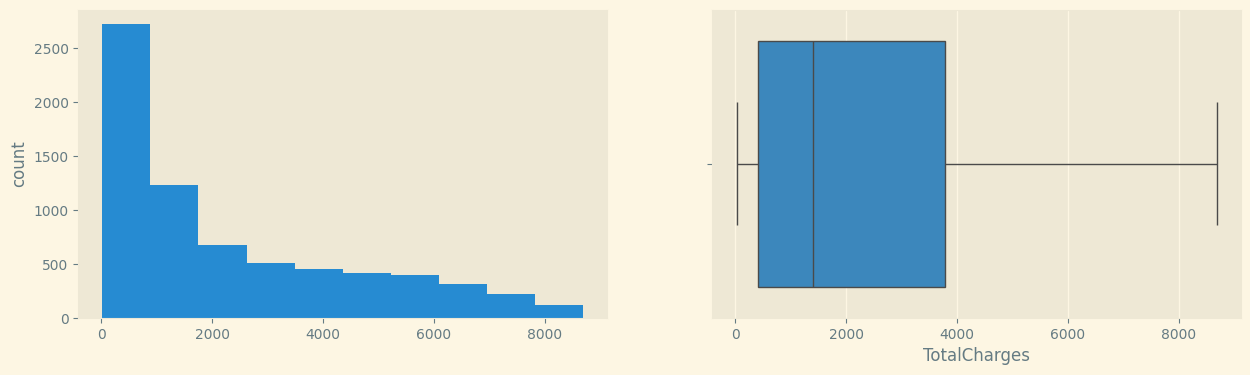

In [176]:
for col in numerical_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.show()

### Review of the relationships of categorical data

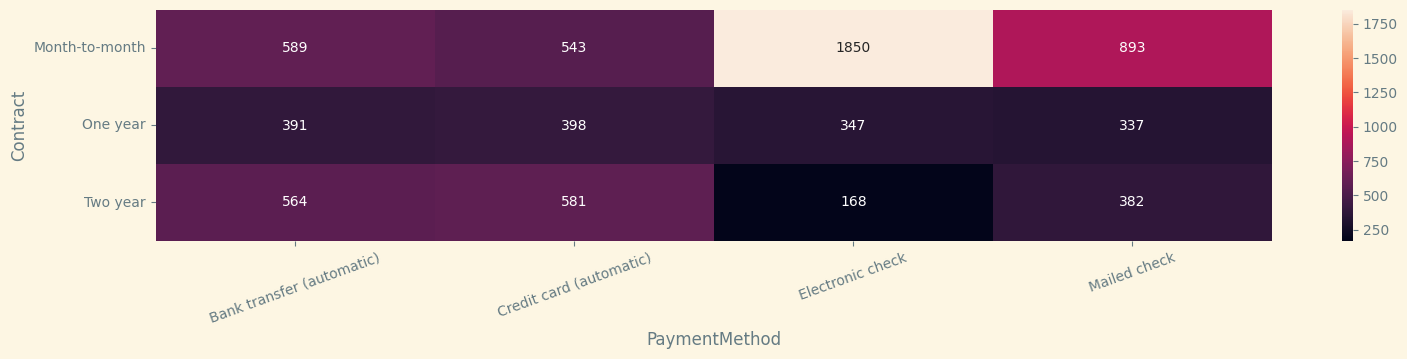

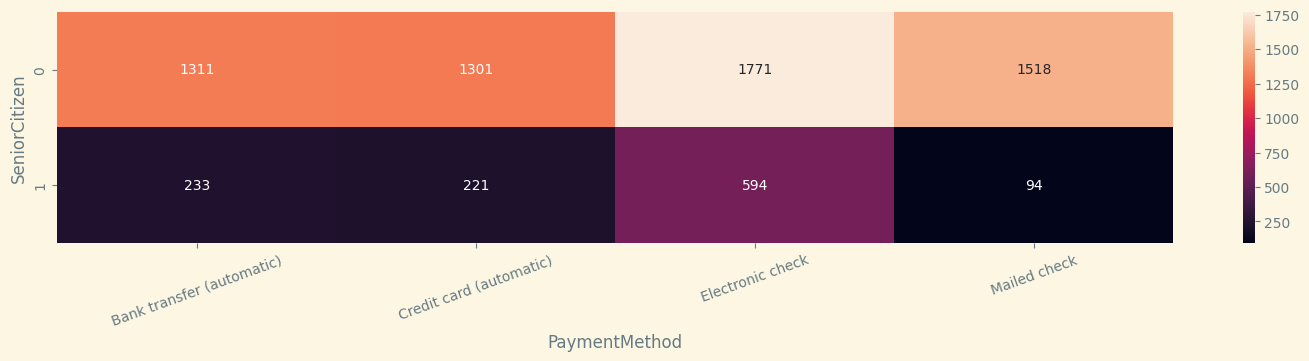

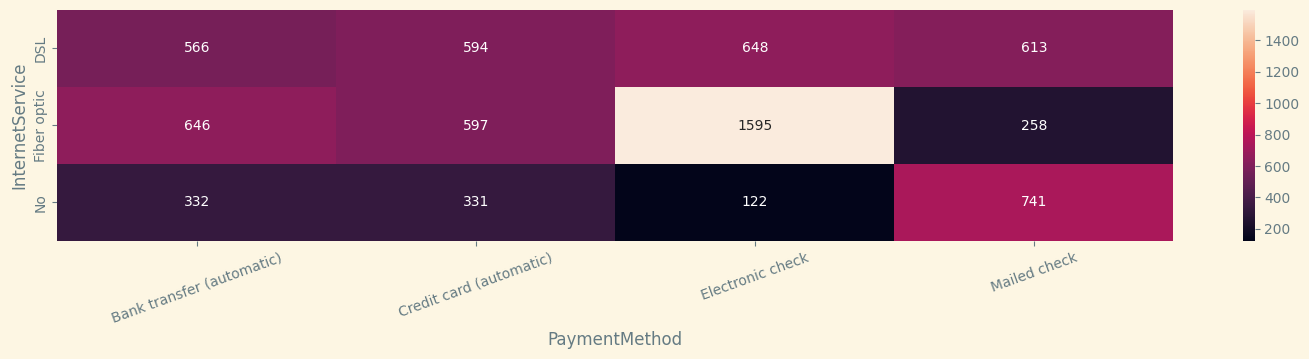

In [177]:
# Review of the relationships of categorical data

fig= plt.figure(figsize = (18, 3))
sns.heatmap(pd.crosstab(index = df['Contract'], columns = df['PaymentMethod']), annot = True, fmt = 'g')
plt.xticks(rotation = 20);

fig= plt.figure(figsize = (18, 3))
sns.heatmap(pd.crosstab(index = df['SeniorCitizen'], columns = df['PaymentMethod']), annot = True, fmt = 'g')
plt.xticks(rotation = 20);

fig= plt.figure(figsize = (18, 3))
sns.heatmap(pd.crosstab(index = df['InternetService'], columns = df['PaymentMethod']), annot = True, fmt = 'g')
plt.xticks(rotation = 20);


### 4. Observations:

- There is no might correlation between the most part of numerical variables.
- We have not found till now how categorical variables might affect the churned customer.

**Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?


## **5. Models:**

### **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [178]:
def number_of_columns(dataframe):
    n = 0
    for column in dataframe.columns:
        n+=1
        print (str(n) +'. '+ column)
number_of_columns(df)

1. gender
2. SeniorCitizen
3. Partner
4. Dependents
5. tenure
6. PhoneService
7. MultipleLines
8. InternetService
9. OnlineSecurity
10. OnlineBackup
11. DeviceProtection
12. TechSupport
13. StreamingTV
14. StreamingMovies
15. Contract
16. PaperlessBilling
17. PaymentMethod
18. MonthlyCharges
19. TotalCharges
20. Churn


In [179]:

# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for)


In [180]:
# Checking that the number of columns increased as the dummie variables where set up
number_of_columns(df)

1. tenure
2. MonthlyCharges
3. TotalCharges
4. Churn
5. gender_Female
6. gender_Male
7. SeniorCitizen_0
8. SeniorCitizen_1
9. Partner_No
10. Partner_Yes
11. Dependents_No
12. Dependents_Yes
13. PhoneService_No
14. PhoneService_Yes
15. MultipleLines_No
16. MultipleLines_No phone service
17. MultipleLines_Yes
18. InternetService_DSL
19. InternetService_Fiber optic
20. InternetService_No
21. OnlineSecurity_No
22. OnlineSecurity_No internet service
23. OnlineSecurity_Yes
24. OnlineBackup_No
25. OnlineBackup_No internet service
26. OnlineBackup_Yes
27. DeviceProtection_No
28. DeviceProtection_No internet service
29. DeviceProtection_Yes
30. TechSupport_No
31. TechSupport_No internet service
32. TechSupport_Yes
33. StreamingTV_No
34. StreamingTV_No internet service
35. StreamingTV_Yes
36. StreamingMovies_No
37. StreamingMovies_No internet service
38. StreamingMovies_Yes
39. Contract_Month-to-month
40. Contract_One year
41. Contract_Two year
42. PaperlessBilling_No
43. PaperlessBilling_Yes
44

In [181]:
# Separating the target variable and other variables
Y = df.Churn
X = df.drop(['Churn'], axis = 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

####  Creating metric function utilities

In [182]:
# Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Churned', 'Churned'], yticklabels = ['Not Churned', 'Churned'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        index = [0],
    )
    return df_perf

### Model 1: Logistic Regression

In [183]:
#split dataset in features and target variable
feature_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

df_feature_cols = df[feature_cols]
X = df_feature_cols # Features
y = df.Churn # Target variable

# split X and y into training and testing sets
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# import the class
#from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

### Model 1: Logistic Regression Model Evaluation using Confusion Matrix

In [184]:
# import the metrics class
#from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[940, 111],
       [192, 166]])

Text(0.5, 427.9555555555555, 'Predicted Churned')

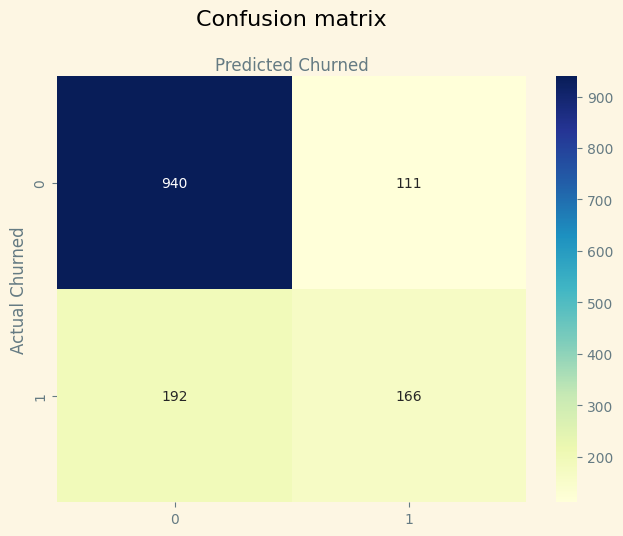

In [185]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churned')
plt.xlabel('Predicted Churned')


In [186]:
target_names = ['NOT CHURNED', 'CHURNED']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 NOT CHURNED       0.83      0.89      0.86      1051
     CHURNED       0.60      0.46      0.52       358

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.78      1409



### Observations:

- Well, you got a classification rate of 78%, considered as good accuracy.

- Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 73% of the time.

- Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 57% of the time.

In [187]:
logreg_test = model_performance_classification(logreg,X_test,y_test)
logreg_test

,Precision,Recall,Accuracy
0,0.714833,0.679037,0.784954


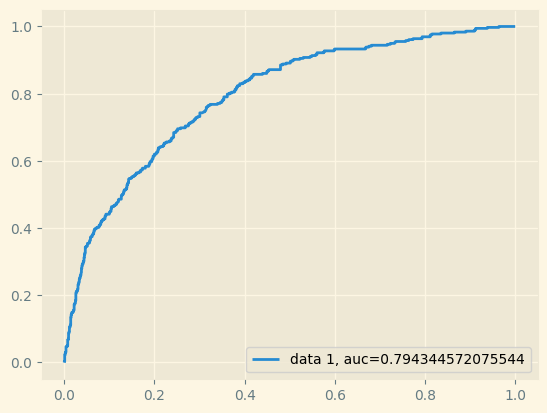

In [188]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Obvervations:

AUC score for the case is 0.79 which can be considered as a good performace, AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

The code source is available at Workspace: Understanding Logistic Regression in Python.

- Advantages
Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

- Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.


Whether an ROC-AUC score of **0.79** is considered "good" for a Logistic Regression model depends on the context of your problem, the dataset, and the baseline performance. Here's a detailed breakdown to help you evaluate this score:

#### 1. Understanding ROC-AUC
   - The ROC-AUC (Receiver Operating Characteristic - Area Under Curve) score measures the model's ability to distinguish between classes. It ranges from 0 to 1:
     - **0.5**: No better than random guessing.
     - **0.7-0.8**: Moderate performance.
     - **0.8-0.9**: Good performance.
     - **>0.9**: Excellent performance.
   - An AUC of **0.79** indicates that the model has a reasonable ability to distinguish between the positive and negative classes.

#### 2. Comparison to Other Models
   - If other models (e.g., Random Forest, Gradient Boosting) achieve significantly higher AUCs (e.g., >0.85), then 0.79 might indicate that Logistic Regression is not the best choice for this problem.
   - If Logistic Regression performs similarly to other models, it might be preferred for its simplicity and interpretability.


### Model 2: Decision Tree

In [189]:
# Separating the target variable and other variables
Y = df.Churn
X = df.drop(['Churn'], axis = 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

In [190]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [191]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       0.99      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



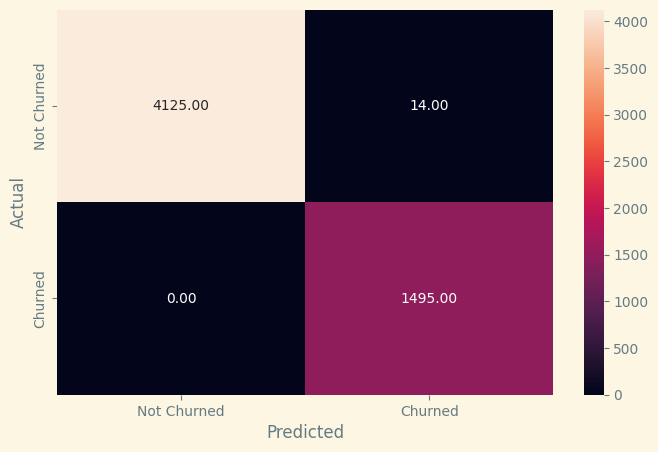

In [192]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.51      0.48      0.50       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



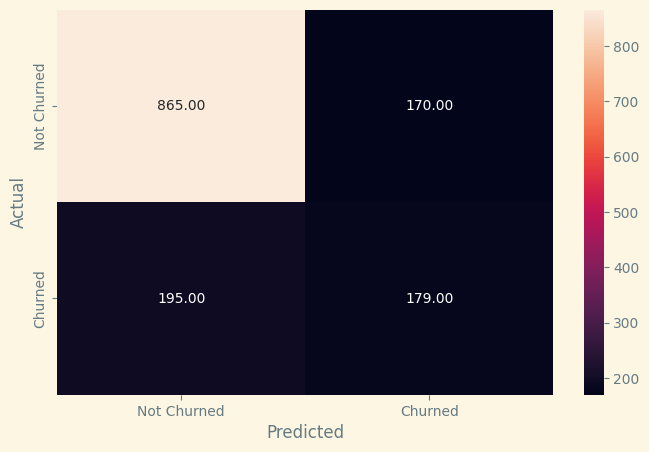

In [193]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [194]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.664466,0.657179,0.740951


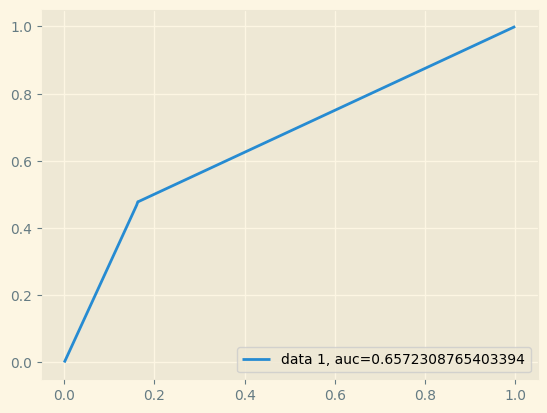

In [195]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Axes: xlabel='Importance', ylabel='None'>

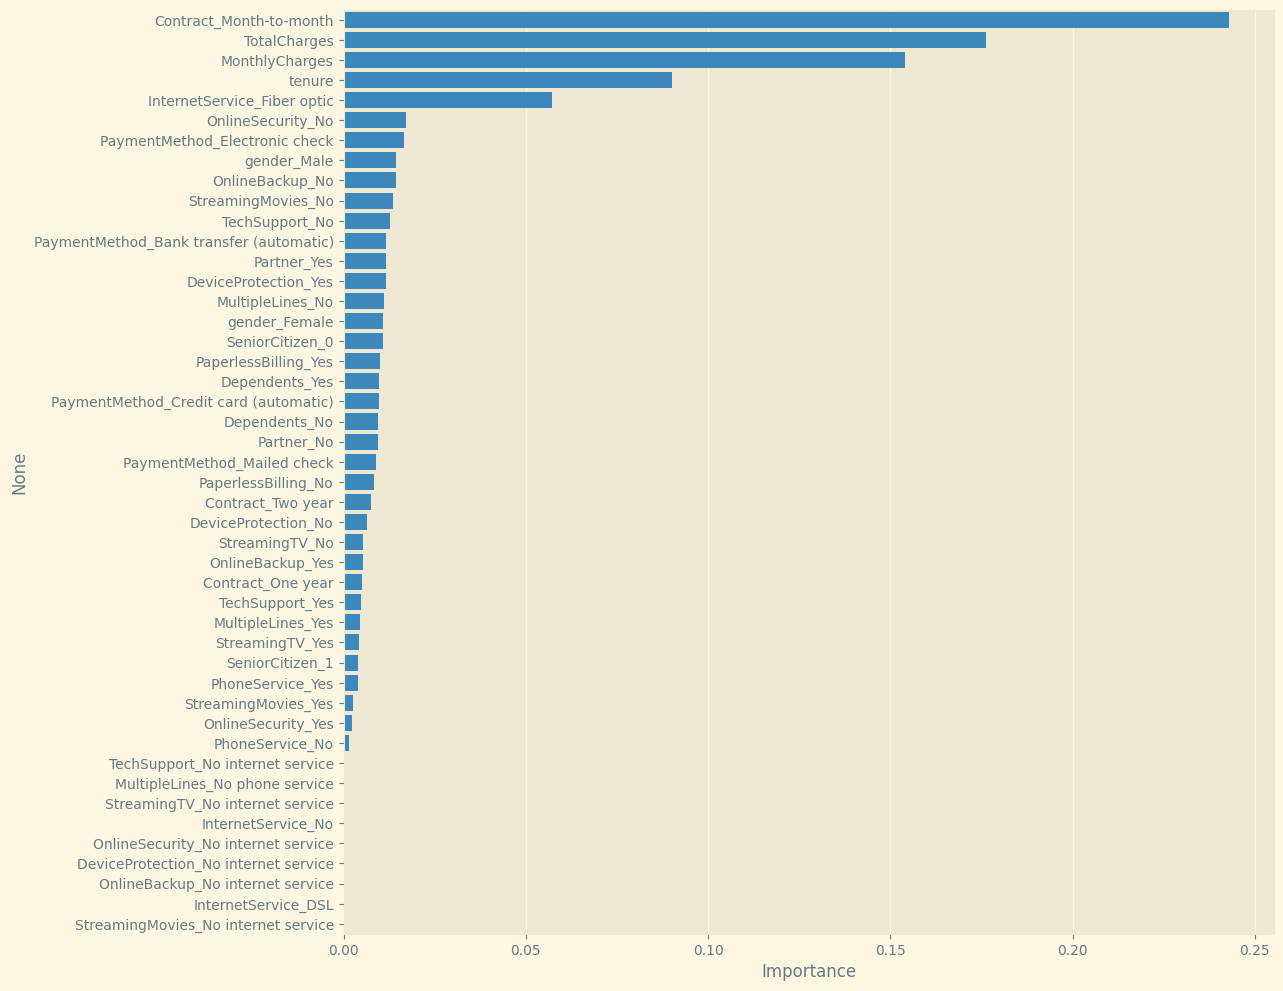

In [196]:
# Plot the feature importance
importances = dt.feature_importances_
#print(importances)
columns = X.columns
#print(columns)
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (12, 12))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

### Observations: 

- According to this model too, Contract_Month-to-month, Total Charges, Monthly Charges and Tenure, are the 4 most important features that describe why a custumer would get churned.

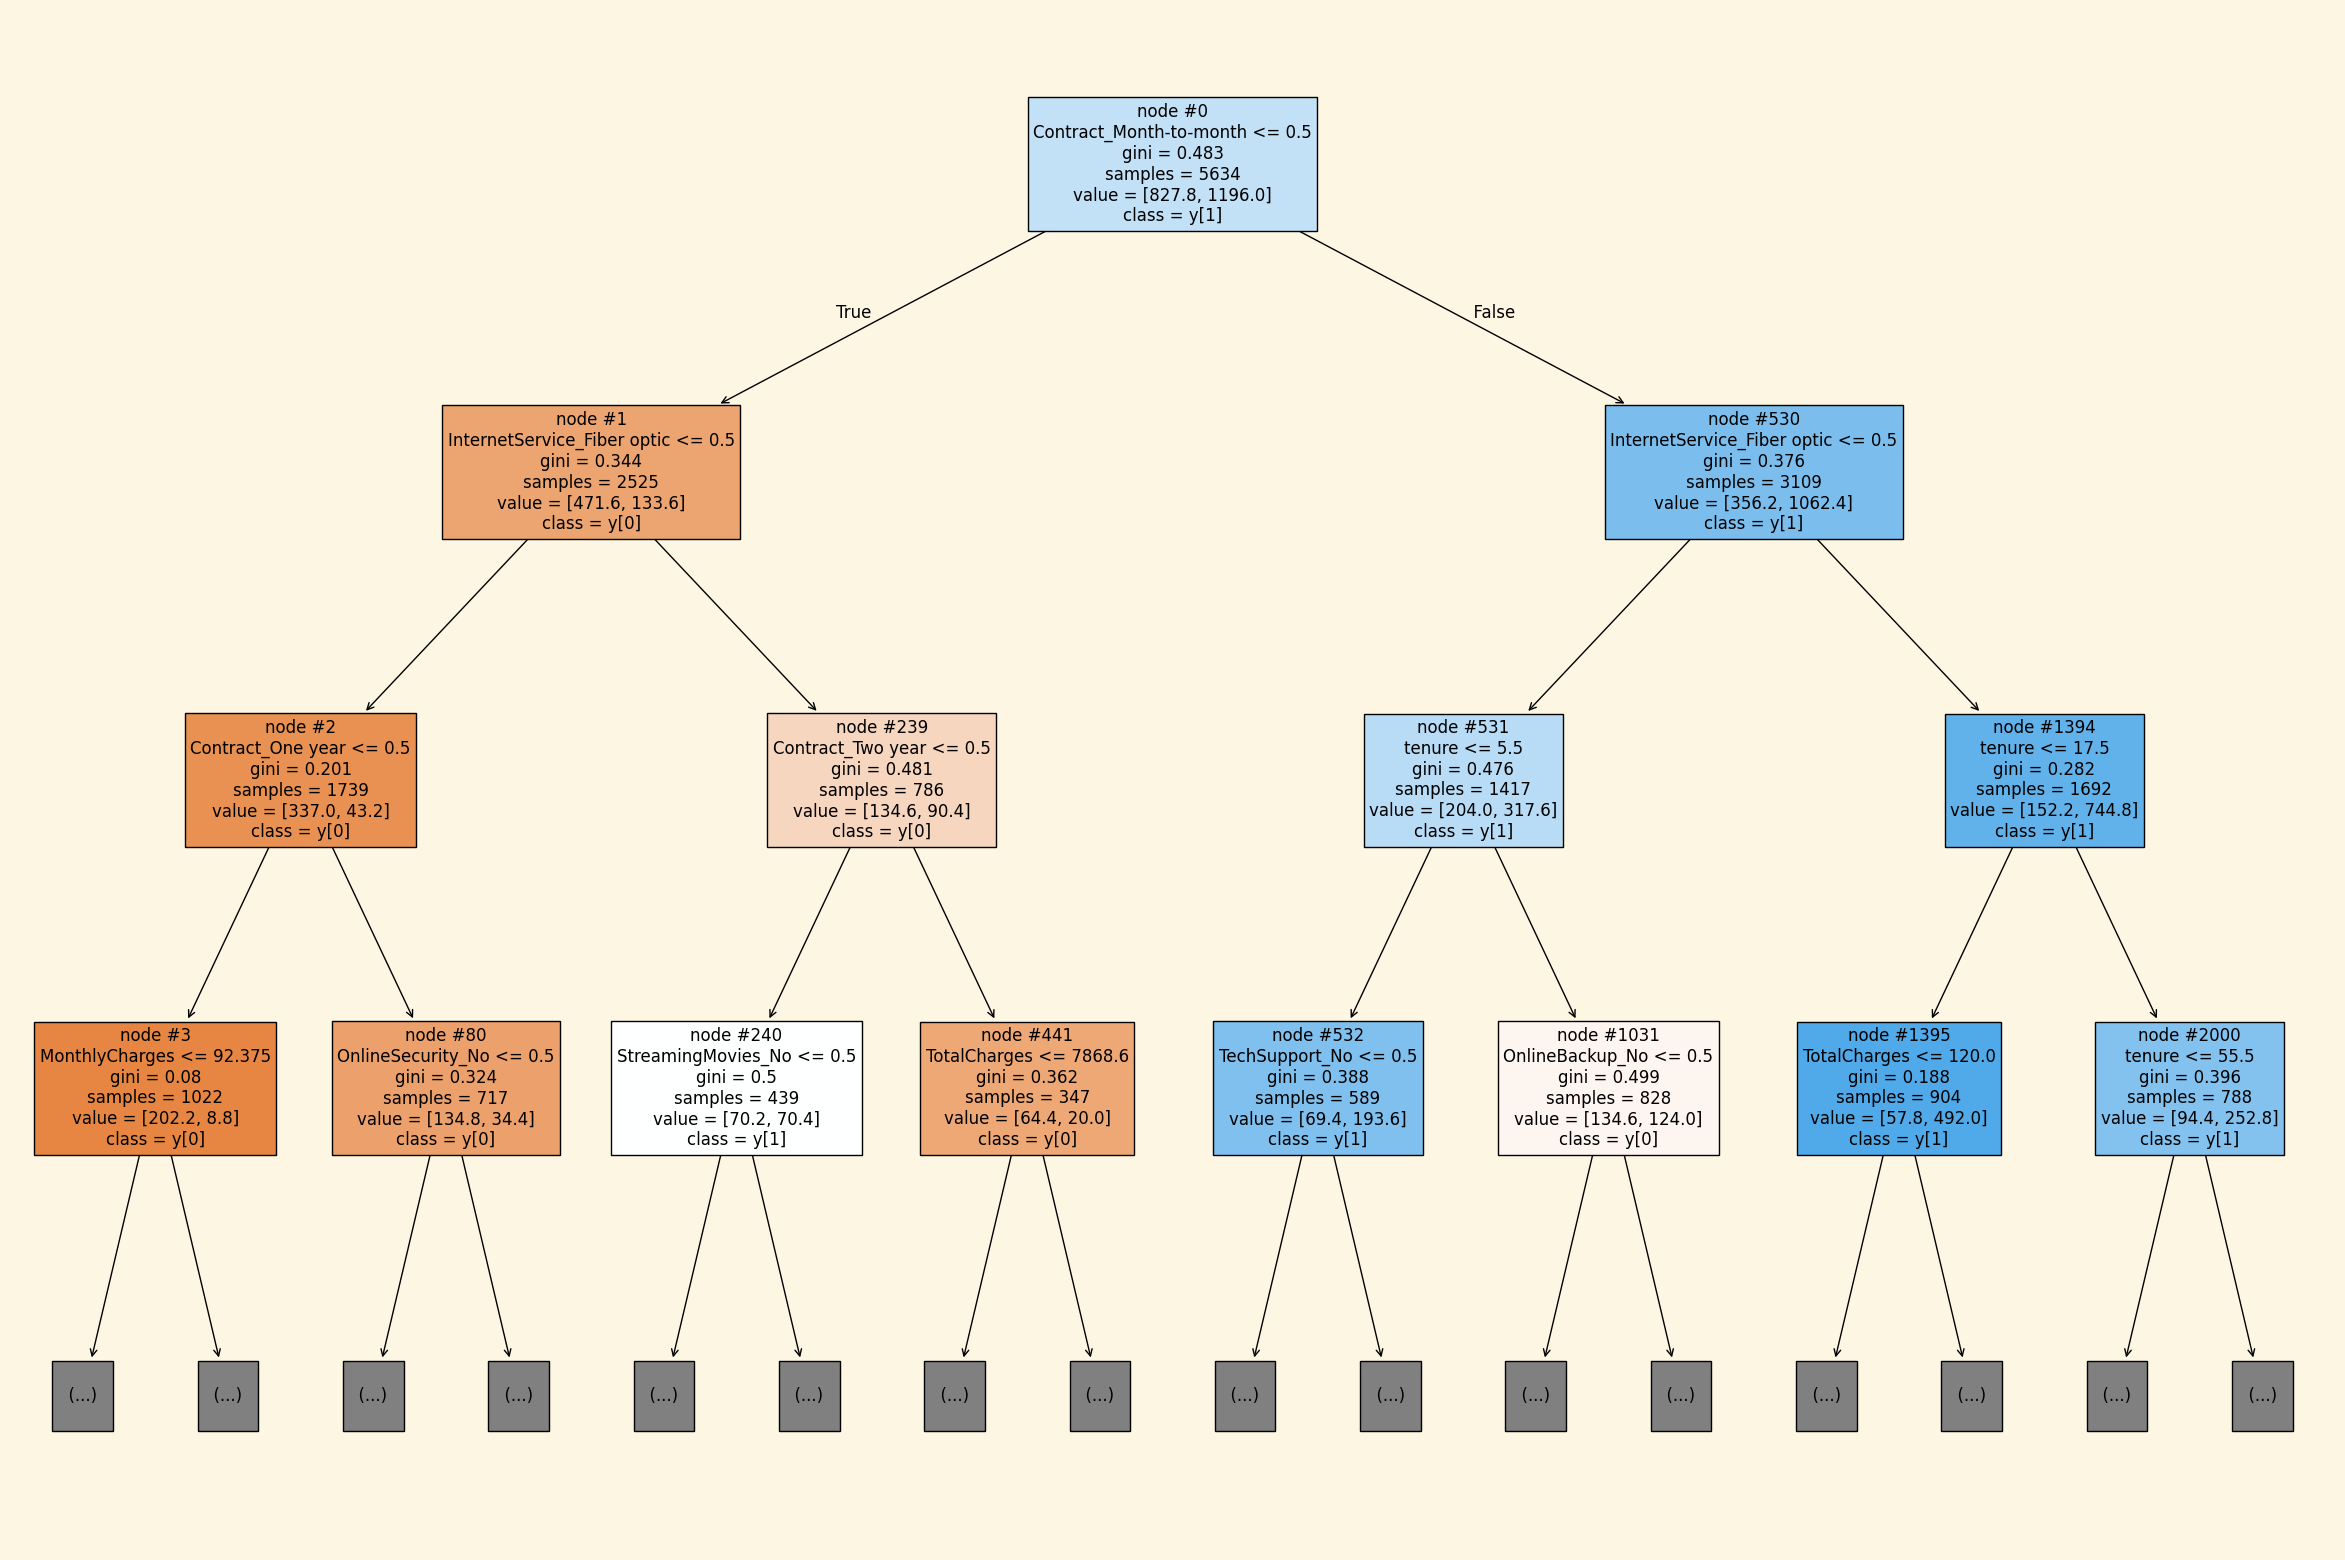

In [197]:
features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

### Model 2: Decision Tree - Hyperparameter Tuning

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

This info comes from: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [198]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2, 5, 10]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=np.int64(4), min_samples_leaf=2,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      4139
           1       0.45      0.91      0.60      1495

    accuracy                           0.68      5634
   macro avg       0.70      0.76      0.67      5634
weighted avg       0.82      0.68      0.70      5634



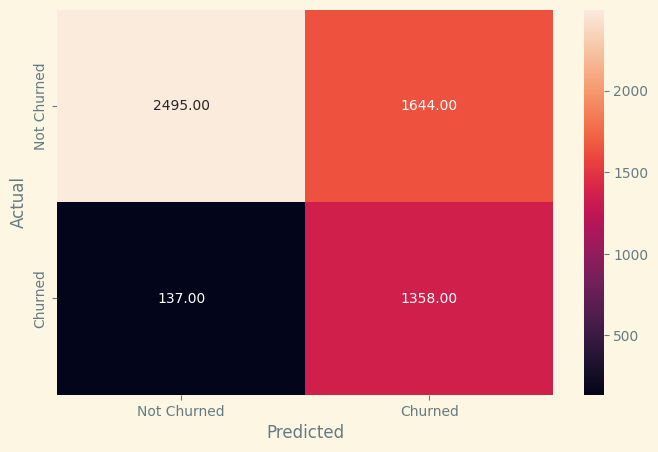

In [199]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly. This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      1035
           1       0.43      0.86      0.58       374

    accuracy                           0.66      1409
   macro avg       0.68      0.73      0.65      1409
weighted avg       0.79      0.66      0.68      1409



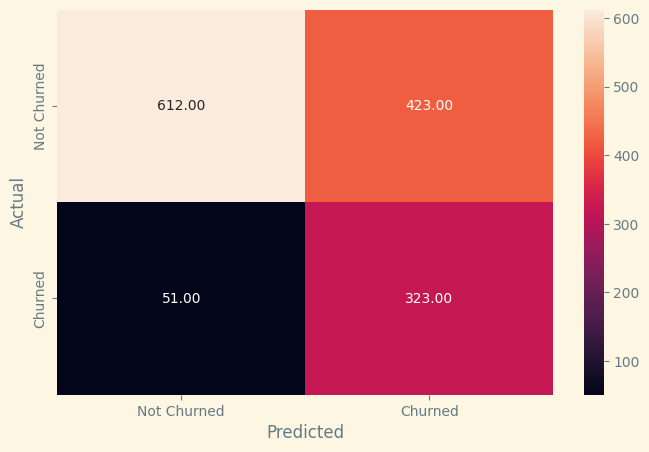

In [200]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [201]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.678026,0.72747,0.663591


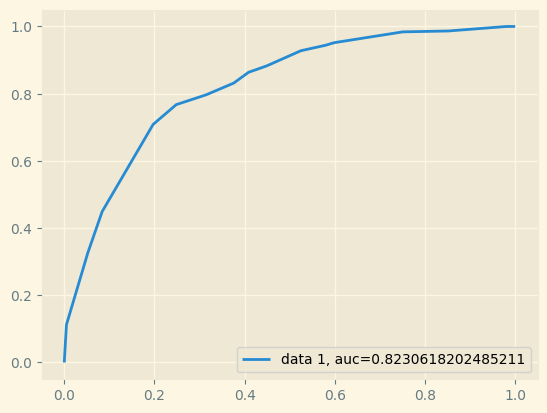

In [202]:
y_pred_proba = dtree_estimator.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Observations:

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone down significantly from .74 to .66 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the lead is going to be converted even if they won't, and this may will cost time and effort to the company.

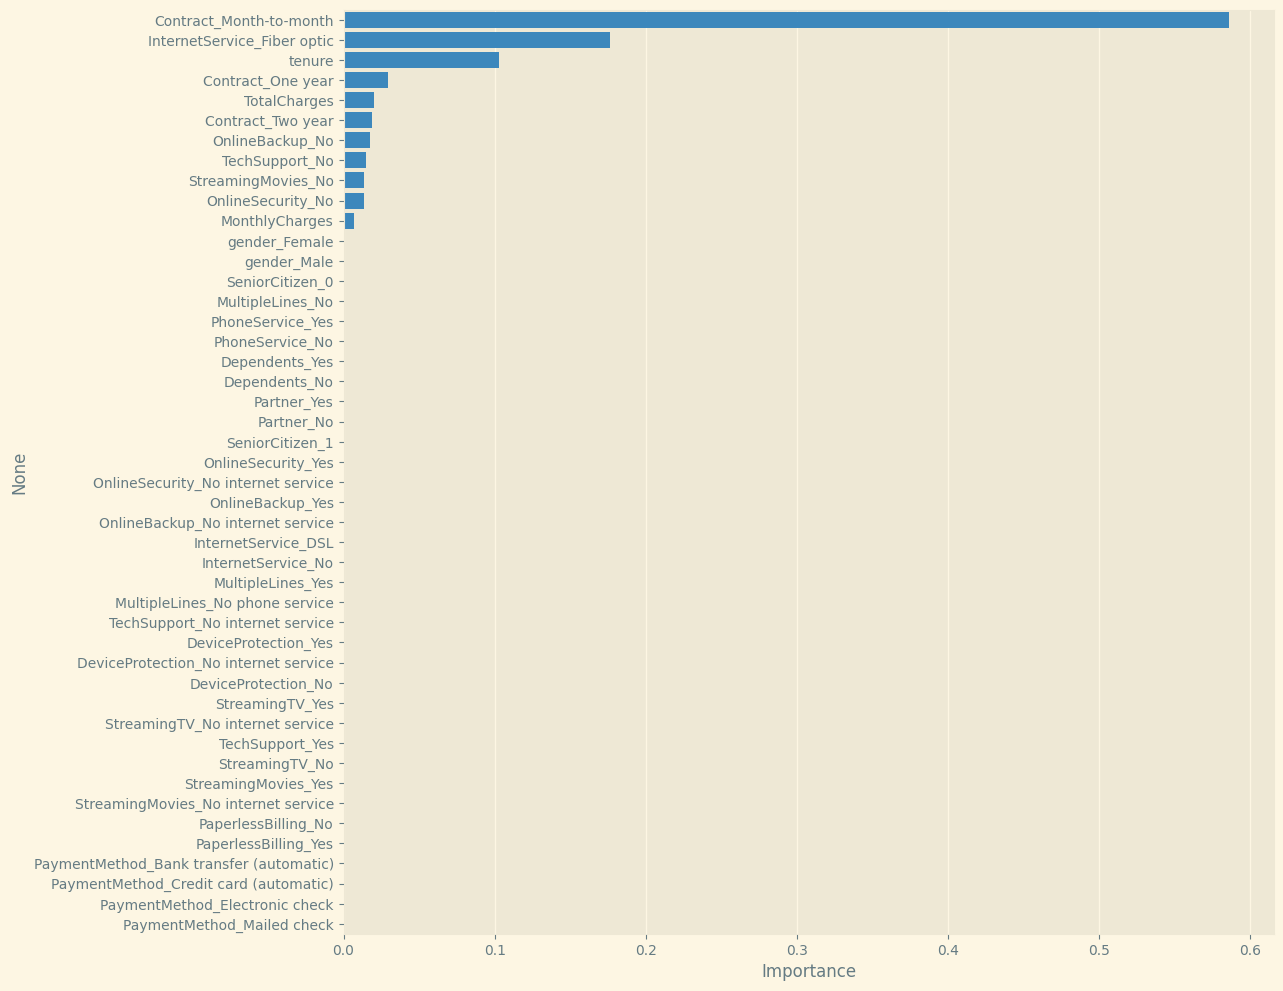

In [203]:
importances = dtree_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (12, 12))
sns.barplot(x=importance_df.Importance, y=importance_df.index);

### Observations:

After tuning the model we are getting that only 3 features are important. It seems like the model is having high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
According to this model too, Contract_Month-to-month, InternetService_Fiber optic, and Tenure, are the 3 most important features that describe why a custumer would get churned.
Let's plot the tree and check if the assumptions about overtime income.

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to max_depth = 4.

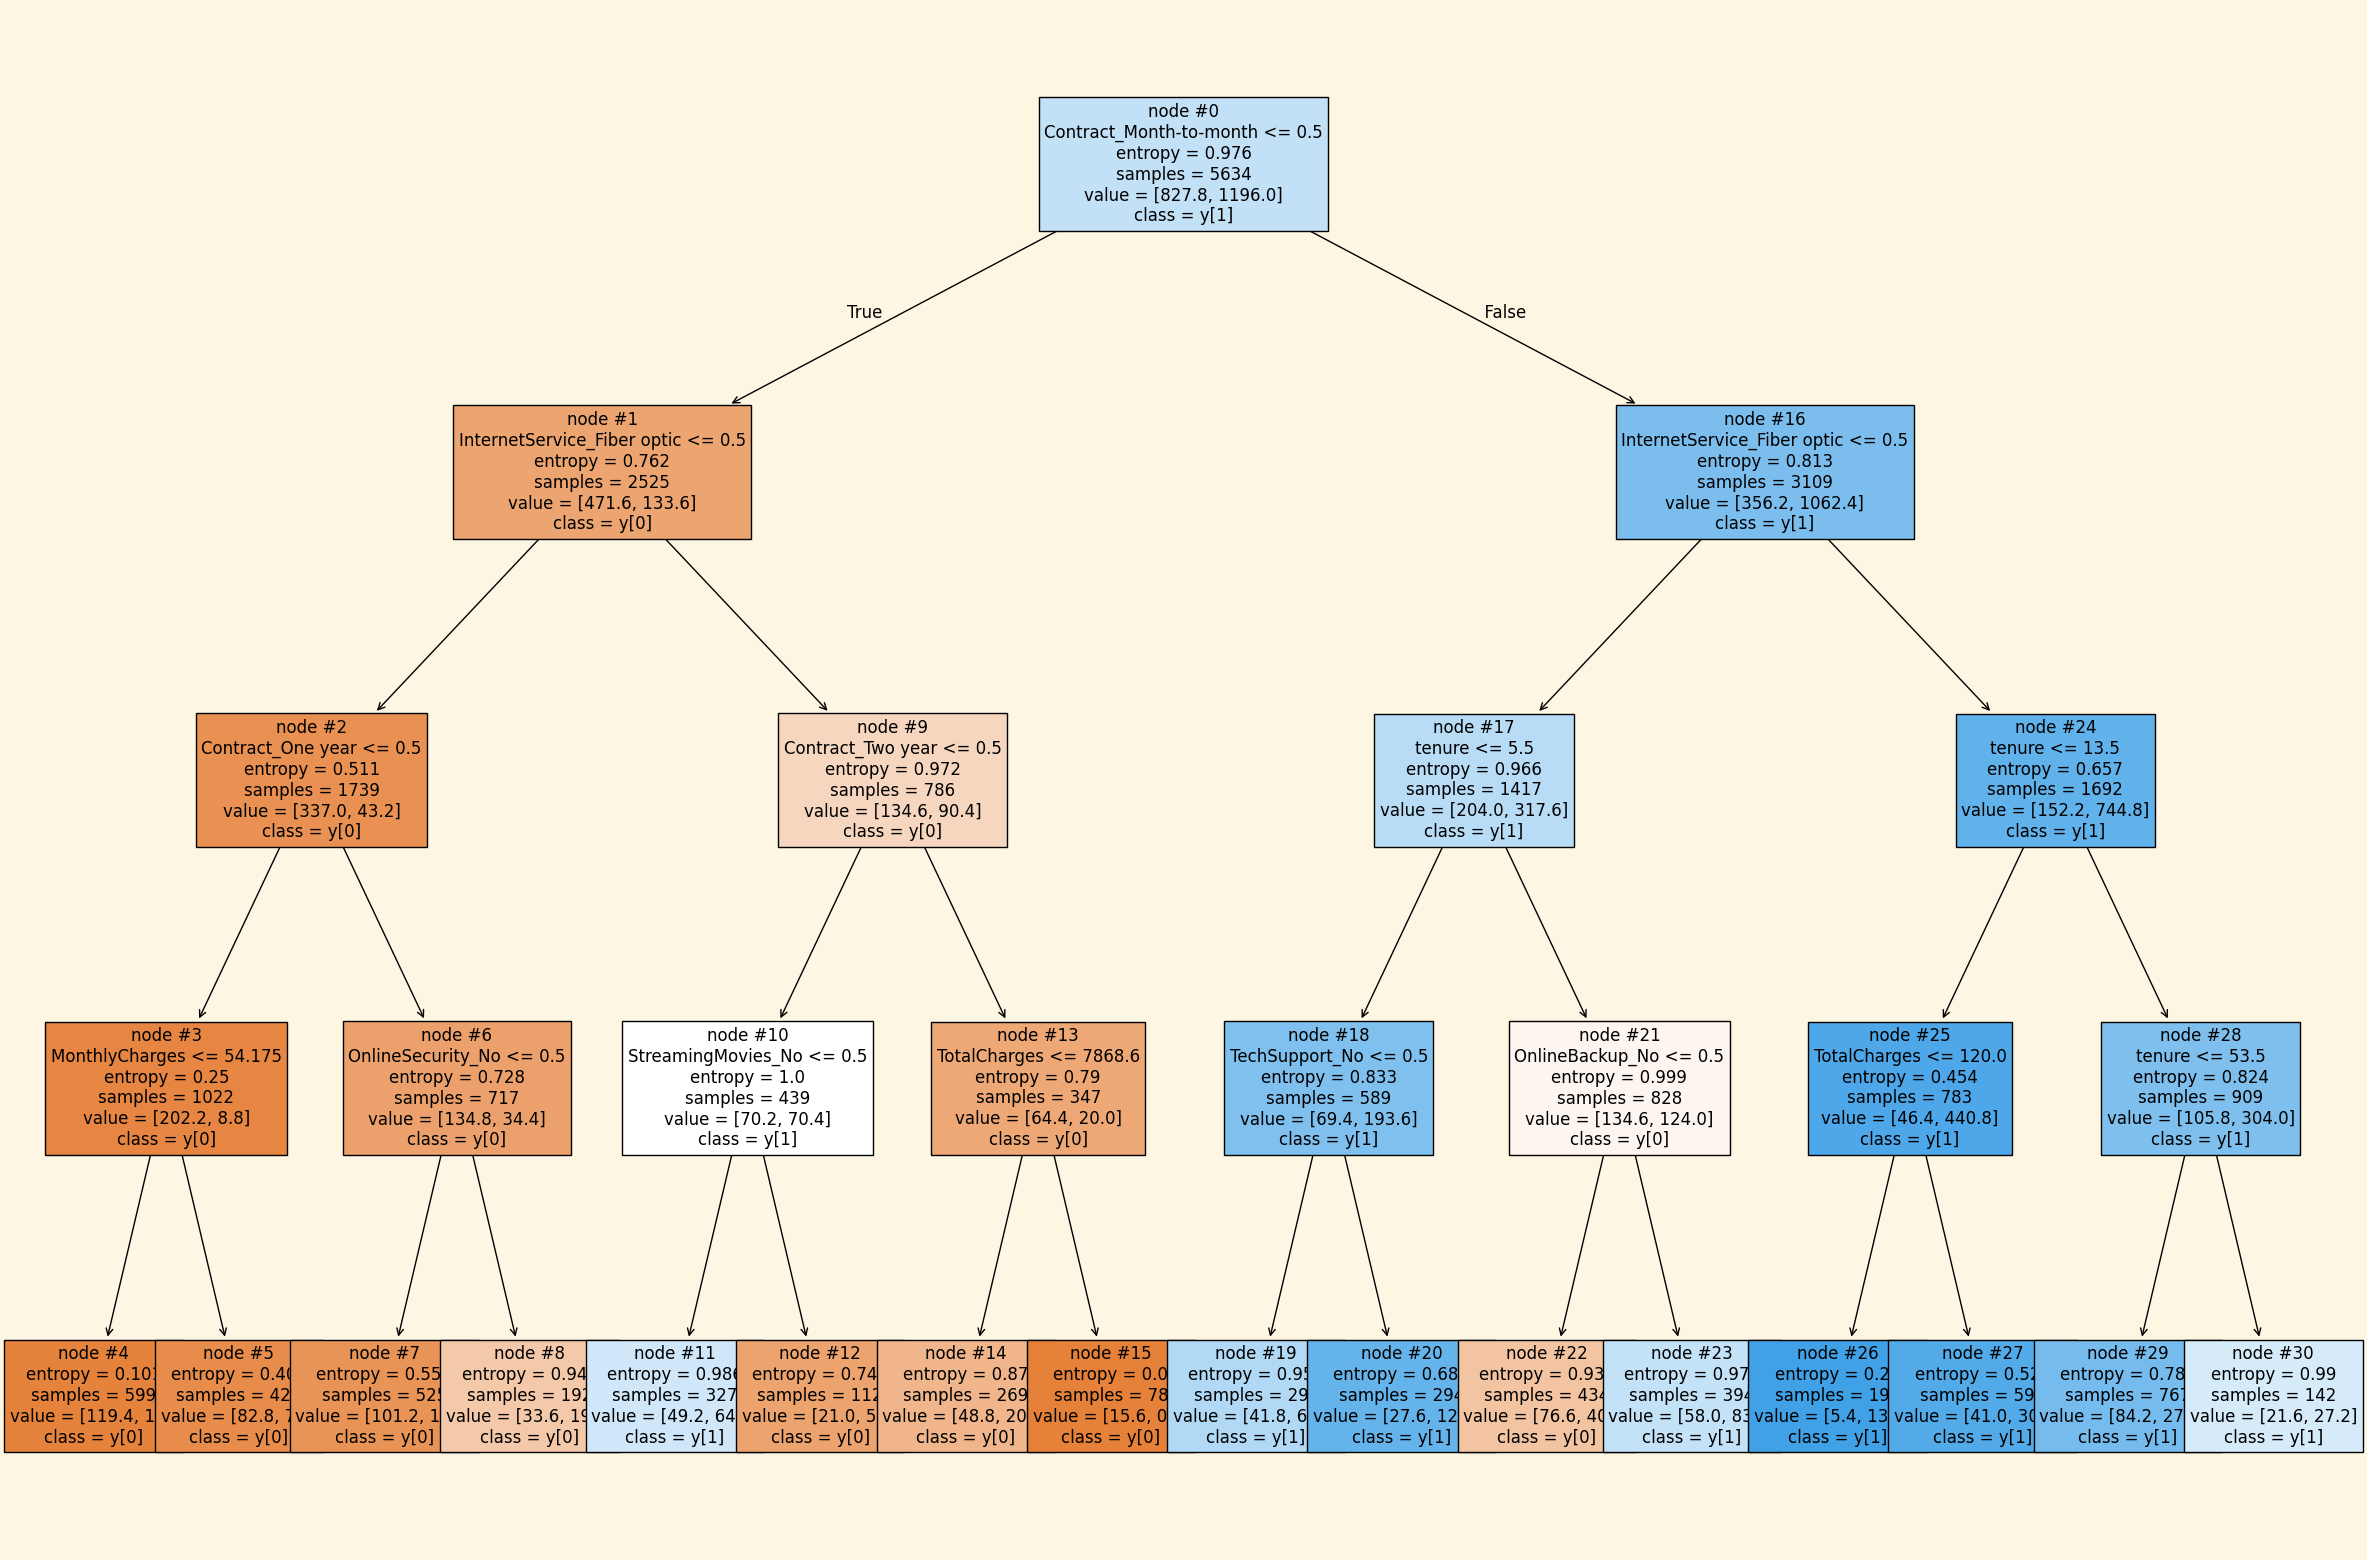

In [204]:
features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dtree_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

### Model 3: Building a Random Forest Classifier

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [205]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 16)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=16)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       0.99      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



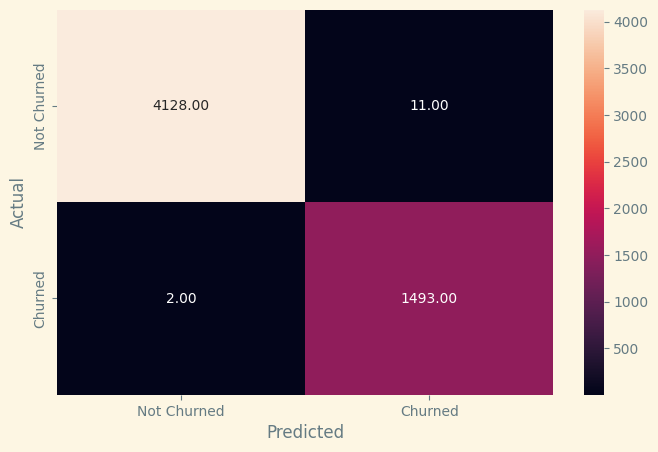

In [206]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

### Observation:

The Random Forest is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



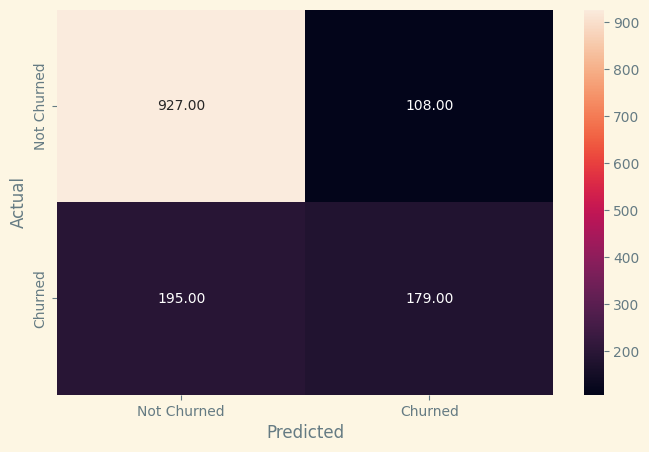

In [207]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

In [208]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.724948,0.687131,0.784954


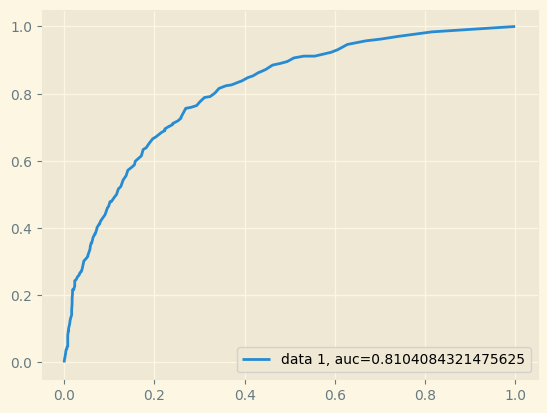

In [209]:
y_pred_proba = rf_estimator.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

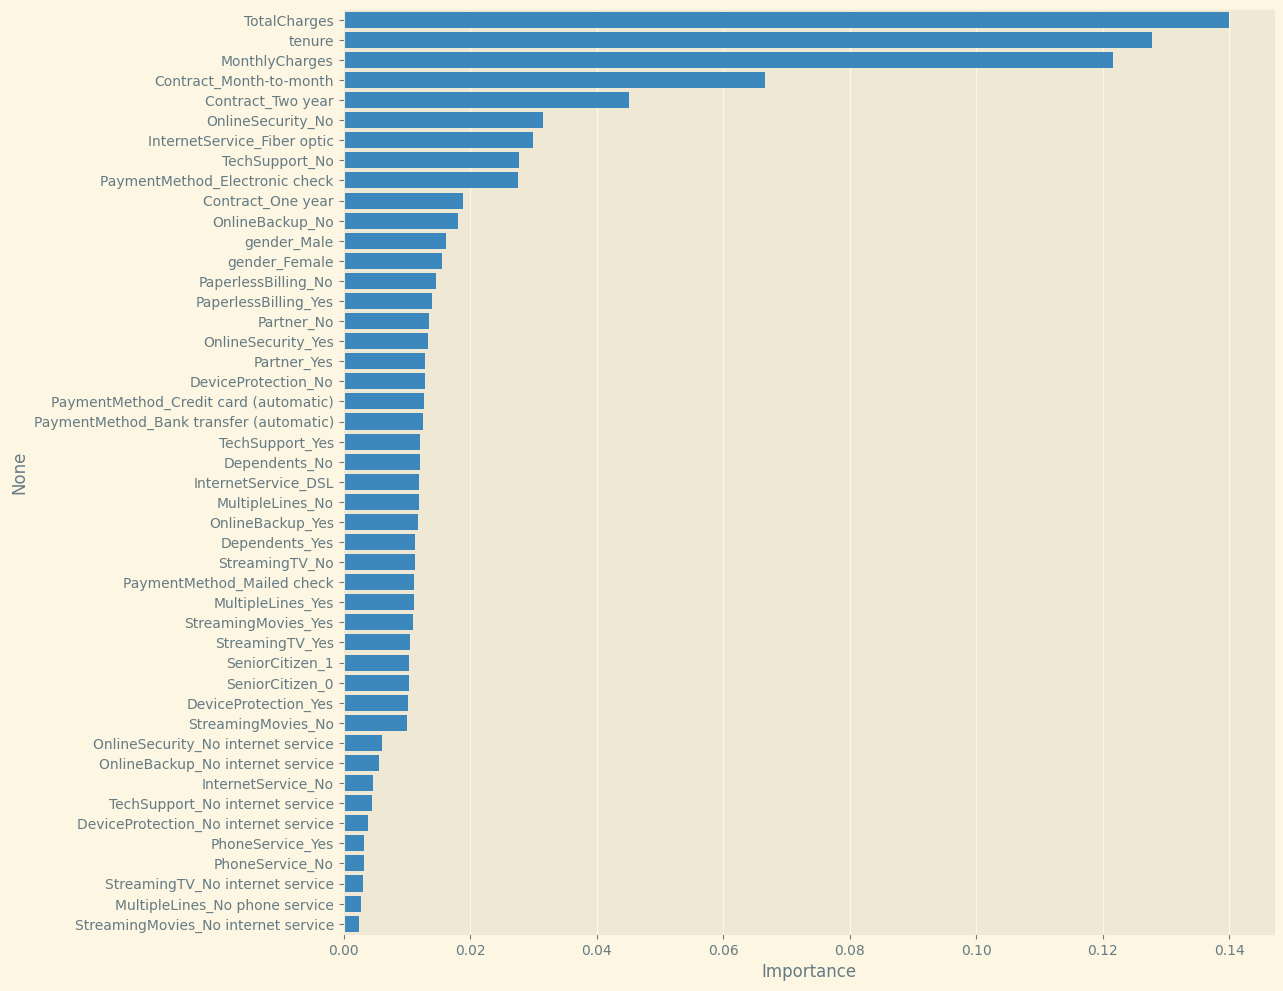

In [210]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (12, 12))
sns.barplot(x=importance_df.Importance, y=importance_df.index);

### Observations:

- The Random Forest further varies about the results from the decision tree that the most important features are now TotalCharges, MonthlyCharges, Tenure and Contract_Month-to-month, **(Total Charges, Monthly Charges, Tenure)** are numerical variables.
- In a Random Forest model, the `feature_importances_` attribute indicates the relative importance of each feature in making predictions. When numerical variables have the highest importance scores, it can be explained by several factors as 'Nature of Numerical Variables', 'Information Gain', 'Data Distribution'


### Model 3: Random Forest Classifier Hyperparameter Tuning

In [211]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [70],
        "min_samples_leaf": np.arange(1, 3, 1),
        "max_features": [0.7, 0.9, 'auto', 'log2'],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [212]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='log2',
                       min_samples_leaf=np.int64(2), n_estimators=70,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4139
           1       0.77      0.97      0.86      1495

    accuracy                           0.92      5634
   macro avg       0.88      0.93      0.90      5634
weighted avg       0.93      0.92      0.92      5634



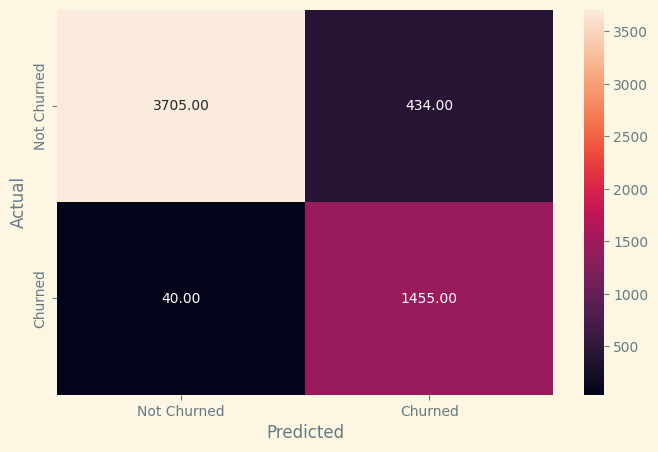

In [213]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.57      0.70      0.63       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



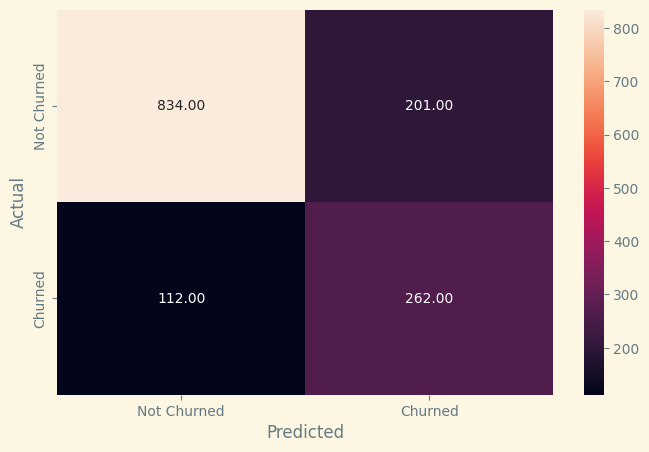

In [214]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [215]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.723741,0.753166,0.777857


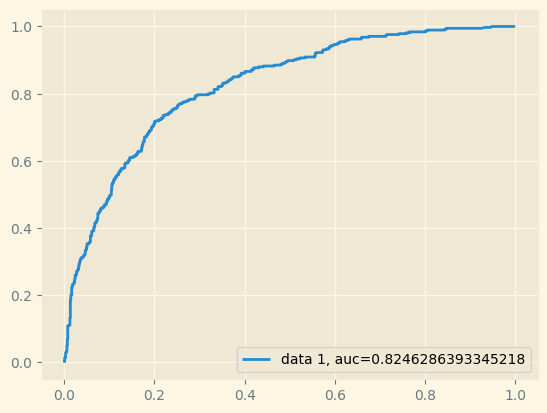

In [216]:
y_pred_proba = rf_estimator_tuned.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

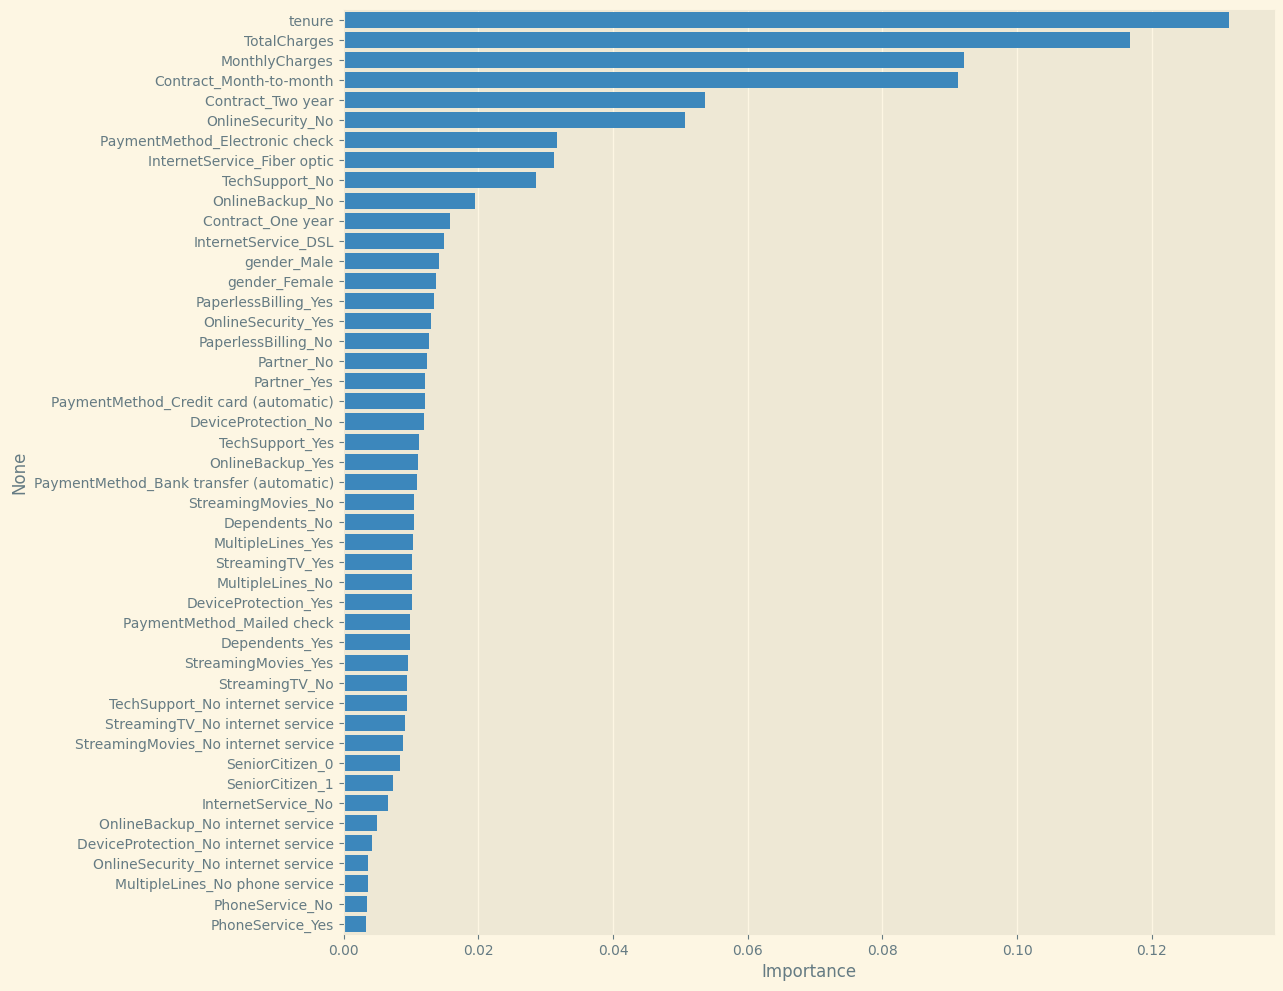

In [217]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (12, 12))
sns.barplot(x=importance_df.Importance, y=importance_df.index);

### Observations:

- There accuracy is very close to the value that we get with no hyperparameter tunning of the model.
- In summary,  **(Total Charges, Monthly Charges, Tenure)** as numerical variables often have higher importance in Random Forests because they provide more opportunities for meaningful splits, are often on a larger scale, and can directly influence the target variable. However, it's important to validate these importance scores and ensure that categorical features are properly encoded and utilized.

## **6. Results and Analysis:**

- Some questions to consider:

1. Does it have a summary of results and analysis?
2. Does it have a proper visualization? (E.g., tables, graphs/plots, heat maps, statistics summary with interpretation, etc.) 
3. Does it use different kinds of evaluation metrics properly? (E.g., if your data is imbalanced, there are other metrics (F1, ROC, or AUC) that are better than mere accuracy). Also, does it explain why they chose the metric? 
4. Does it iterate the training and evaluation process and improve the performance? Does it address selecting features through the iteration process?
5. Did the author compare the results from the multiple models and make appropriate comparisons?


### Visualize the built model metrics (Precision, Recall, Accuracy, ROC AUC curve) for all built classification models:

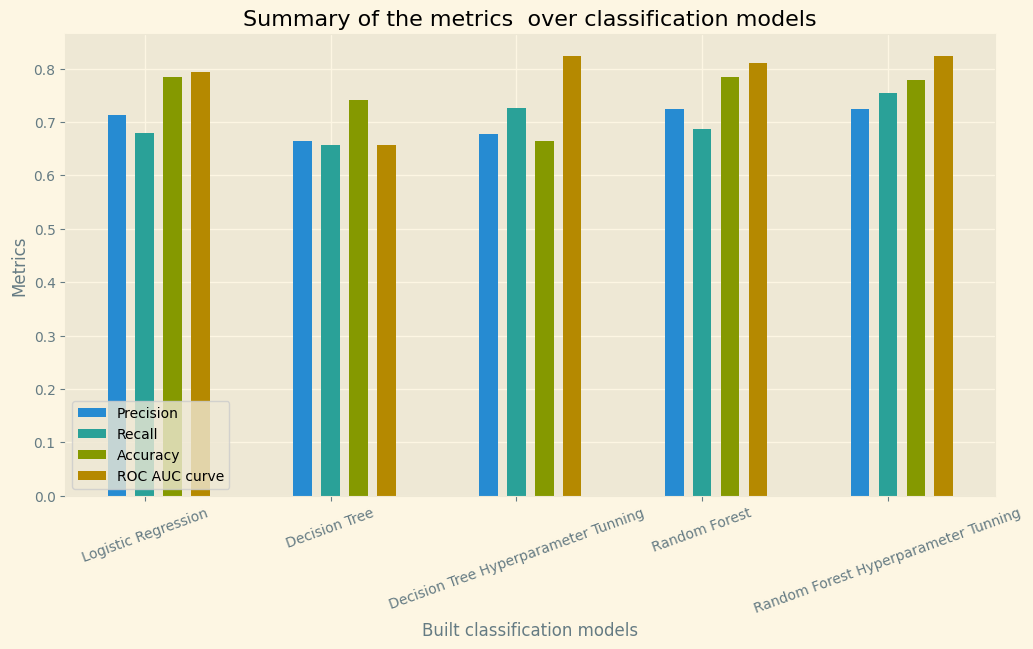

In [218]:
X = ['Logistic Regression','Decision Tree','Decision Tree Hyperparameter Tunning','Random Forest','Random Forest Hyperparameter Tunning'] 
vals_recision = [0.714, 0.664, 0.678, 0.725, 0.724] 
vals_recall = [0.679, 0.657, 0.727, 0.687, 0.754] 
vals_accuracy = [0.785, 0.741, 0.664, 0.785, 0.779] 
vals_roc_auc_curve = [0.794, 0.657, 0.823, 0.810, 0.824] 

X_axis = np.arange(len(X)) 

fig = plt.figure(figsize = (12, 6))  
plt.bar(X_axis - 0.15, vals_recision, 0.1, label = 'Precision') 
plt.bar(X_axis + 0.0, vals_recall, 0.1, label = 'Recall') 
plt.bar(X_axis + 0.15, vals_accuracy, 0.1, label = 'Accuracy') 
plt.bar(X_axis + 0.3, vals_roc_auc_curve, 0.1, label = 'ROC AUC curve') 
plt.xticks(X_axis, X) 
plt.xticks(rotation = 20)
plt.title('Summary of the metrics  over classification models')
plt.xlabel('Built classification models')
plt.ylabel('Metrics')
plt.legend(loc=3) 
plt.show() 

## **7. Discussion and Conclusion:**

As we get similar accuracy metric results for the 'Logistic Regression' and 'Random Forest' models, lets review som key trade-offs to consider:

### 1. **Interpretability**
   - **Logistic Regression**: 
     - Highly interpretable. The coefficients of the model directly indicate the relationship between each feature and the target variable (e.g., positive or negative influence).
     - Easier to explain to stakeholders, especially in domains where interpretability is critical (e.g., healthcare, finance).
   - **Random Forest**:
     - Less interpretable. While you can extract feature importance scores, the model itself is a black box consisting of many decision trees.
     - Techniques like SHAP (SHapley Additive exPlanations) or partial dependence plots can help interpret Random Forests, but they add complexity.

### 2. **Model Complexity**
   - **Logistic Regression**:
     - Simpler model with fewer parameters. It assumes a linear relationship between the features and the log-odds of the target.
     - Less prone to overfitting, especially with regularization (e.g., L1 or L2 penalties).
   - **Random Forest**:
     - More complex model with many decision trees. It can capture non-linear relationships and interactions between features.
     - Prone to overfitting if not properly tuned (e.g., too many trees or insufficient pruning).

### 3. **Training and Inference Speed**
   - **Logistic Regression**:
     - Faster to train and make predictions, especially with large datasets.
     - Scales well with the number of features and samples.
   - **Random Forest**:
     - Slower to train due to the ensemble of trees. Training time increases with the number of trees and depth of each tree.
     - Inference can also be slower, especially with large forests.

### 4. **Handling Non-Linearity and Feature Interactions**
   - **Logistic Regression**:
     - Assumes a linear relationship between features and the log-odds of the target. It cannot automatically capture non-linear relationships or complex interactions between features.
     - Feature engineering (e.g., polynomial features, interaction terms) is required to model non-linearities.
   - **Random Forest**:
     - Naturally handles non-linear relationships and feature interactions without explicit feature engineering.
     - Can model complex patterns in the data, making it more flexible.

### 5. **Robustness to Outliers and Noise**
   - **Logistic Regression**:
     - Sensitive to outliers in the feature space, as they can disproportionately influence the coefficients.
     - Sensitive to multicollinearity (high correlation between features), which can make coefficient estimates unstable.
   - **Random Forest**:
     - More robust to outliers and noise due to the ensemble approach (averaging over many trees).
     - Handles multicollinearity better because it splits on individual features rather than relying on linear combinations.

### 6. **Feature Scaling**
   - **Logistic Regression**:
     - Requires features to be scaled (e.g., standardized or normalized) for optimal performance, especially when using regularization.
   - **Random Forest**:
     - Does not require feature scaling, as it splits features based on thresholds rather than distances.

### 7. **Data Requirements**
   - **Logistic Regression**:
     - Works well with smaller datasets, provided the data is not too noisy or highly correlated.
     - Requires fewer samples to train effectively compared to Random Forest.
   - **Random Forest**:
     - Requires more data to train effectively, especially to avoid overfitting.
     - Performs better with larger datasets where it can fully leverage its ability to capture complex patterns.

### 8. **Regularization and Tuning**
   - **Logistic Regression**:
     - Easier to regularize (e.g., L1 or L2 penalties) to prevent overfitting and improve generalization.
     - Fewer hyperparameters to tune (e.g., regularization strength).
   - **Random Forest**:
     - More hyperparameters to tune (e.g., number of trees, max depth, min samples split), which can make optimization more time-consuming.
     - Regularization is achieved through parameters like `max_depth` or `min_samples_leaf`.

### 9. **Use Case and Domain**
   - **Logistic Regression**:
     - Preferred in domains where interpretability and simplicity are critical (e.g., healthcare, finance, regulatory compliance).
     - Suitable for problems where the relationship between features and the target is approximately linear.
   - **Random Forest**:
     - Preferred in domains where predictive performance is more important than interpretability (e.g., marketing, recommendation systems).
     - Suitable for problems with complex, non-linear relationships and interactions.

### Summary of Trade-offs:
| **Aspect**               | **Logistic Regression**                          | **Random Forest**                          |
|--------------------------|-------------------------------------------------|--------------------------------------------|
| **Interpretability**      | High                                            | Low                                        |
| **Model Complexity**      | Simple                                          | Complex                                    |
| **Training Speed**        | Fast                                            | Slow                                       |
| **Handling Non-Linearity**| Requires feature engineering                    | Handles naturally                          |
| **Robustness to Outliers**| Sensitive                                       | Robust                                     |
| **Feature Scaling**       | Required                                        | Not required                               |
| **Data Requirements**     | Works well with small datasets                  | Requires larger datasets                   |
| **Hyperparameter Tuning** | Fewer parameters to tune                        | More parameters to tune                    |
| **Use Case**              | Interpretability-critical domains               | Performance-critical domains               |

### When to Choose Logistic Regression:
- You need a simple, interpretable model.
- The relationship between features and the target is approximately linear.
- You have a small dataset or limited computational resources.
- Interpretability is critical for stakeholders.

### When to Choose Random Forest:
- You need high predictive performance and can sacrifice interpretability.
- The data has complex, non-linear relationships and interactions.
- You have a large dataset and sufficient computational resources.
- Interpretability is less important than accuracy.

Ultimately, the choice depends on your specific use case, the importance of interpretability, and the nature of your data.


## **Thanks a lot!**